<a href="https://colab.research.google.com/github/SanjanaS183/PCA-for-breast-cancer/blob/main/PCA_for_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [ ]:
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20     10
21      7
22      1
23    1.0
24      1
Name: Bare Nuclei, dtype: object


In [ ]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


In [ ]:
 data['Bare Nuclei'] = data2['Bare Nuclei']

In [ ]:
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data2[col].isna().sum()))
    data = data.dropna()

Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 0
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
# Separating out the features
x = data.loc[:, features].values


In [ ]:
print(x)

[[5 1 1 ... 1 1 2]
 [5 4 4 ... 2 1 2]
 [3 1 1 ... 1 1 2]
 ...
 [5 10 10 ... 10 2 4]
 [4 8 6 ... 6 1 4]
 [4 8 8 ... 4 1 4]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
data3 = data['Class']
principalDf['Class'] = data3
print(principalDf)

     principal component 1  principal component 2  Class
0                -4.533612               0.016022    2.0
1                 4.698577              -4.672853    2.0
2                -4.683503              -0.606807    2.0
3                 4.970368               3.423539    2.0
4                -4.171511              -0.091477    2.0
..                     ...                    ...    ...
678              -5.015485              -0.426349    2.0
679              -5.997655               0.226304    2.0
680              10.338720               7.271599    4.0
681               6.510944               2.491060    4.0
682               7.602745               1.215308    2.0

[683 rows x 3 columns]


In [ ]:
exp_var_pca = pca.explained_variance_ratio_
print(exp_var_pca)

[0.69227915 0.07115388]


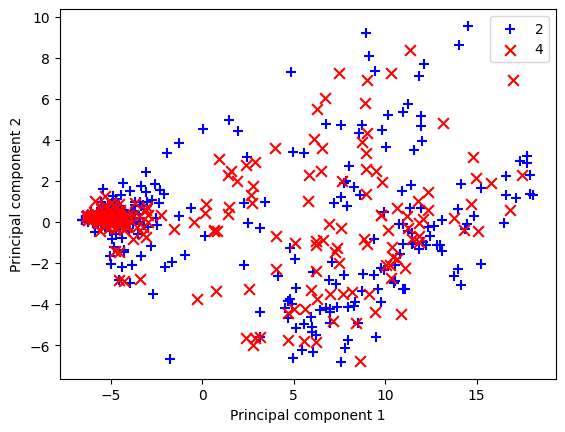

In [ ]:
import matplotlib.pyplot as plt
colors = {2:'b', 4:'r'}
markerTypes = {2:'+', 4:'x'}
for cancertype in markerTypes:
    d = principalDf[principalDf['Class']==cancertype]
    plt.scatter(d['principal component 1'],d['principal component 2'],c=colors[cancertype],s=60,marker=markerTypes[cancertype])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(markerTypes.keys())
plt.show()

Explained Variance Ratio as a metric to evaluate the usefulness of your principal components and to choose how many components to use in your model. The explained variance ratio is the percentage of variance that is attributed by each of the selected components. 